In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import sklearn.neighbors

In [2]:
df = pd.read_csv("Heart_Disease_Prediction.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       270 non-null    int64  
 1   Sex       270 non-null    int64  
 2   CP        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   Chol      270 non-null    int64  
 5   FBS       270 non-null    int64  
 6   restECG   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  Ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  num       270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [4]:
df.head()

,Age,Sex,CP,trestbps,Chol,FBS,restECG,thalach,exang,oldpeak,slope,Ca,thal,num
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [5]:
df.describe()

,Age,Sex,CP,trestbps,Chol,FBS,restECG,thalach,exang,oldpeak,slope,Ca,thal,num
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [6]:
df.shape

(270, 14)

In [7]:
# Checking for missing values.
df.isnull().values.any()

False

In [8]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.35)

In [9]:
# Using standard scaler as a standardization technique.
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [10]:
accuracies = []
precisions = []
recalls = []
AUCs = []

In [11]:
def p_m(history, num_epochs):
    accuracy = history.history['accuracy']
    precision = history.history['precision']
    recall = history.history['recall']
    auc = history.history['auc']
    i = num_epochs-1
    performance_metrics = [accuracy[i], precision[i], recall[i], auc[i]]
    print(performance_metrics)
    plot_history(history, path="standard.png")
    return performance_metrics

# LSTM

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt
import pickle

In [13]:
# Define hyperparameters
learning_rate = 0.001
batch_size = 50
num_epochs = 300

In [14]:
def LSTM(X_train):
    classifier = tf.keras.Sequential()
    # Must define the input shape in the first layer of the neural network
    classifier.add(tf.keras.layers.LSTM(units=128, input_shape=(X_train.shape[1], 1)))
    classifier.add(tf.keras.layers.Dropout(0.2))
  #classifier.add(tf.keras.layers.LSTM(units=128, activation='tanh'))
  #classifier.add(Dense(units=1))
    classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=["accuracy","AUC","Precision","Recall"]) 
    return classifier


model = LSTM(x_train)

In [15]:
# fit the model to the training data
LSTM_history=model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=100, batch_size=10)

Epoch 1/100


18/18 [==============================] - 6s 93ms/step - loss: 0.6243 - accuracy: 0.7143 - auc: 0.8192 - precision: 0.7027 - recall: 0.6500 - val_loss: 0.5508 - val_accuracy: 0.7474 - val_auc: 0.7998 - val_precision: 0.7000 - val_recall: 0.7000
Epoch 2/100
18/18 [==============================] - 0s 22ms/step - loss: 0.5150 - accuracy: 0.7829 - auc: 0.8245 - precision: 0.7625 - recall: 0.7625 - val_loss: 0.5313 - val_accuracy: 0.7158 - val_auc: 0.8111 - val_precision: 0.6444 - val_recall: 0.7250
Epoch 3/100
18/18 [==============================] - 0s 20ms/step - loss: 0.4933 - accuracy: 0.8057 - auc: 0.8716 - precision: 0.7875 - recall: 0.7875 - val_loss: 0.5171 - val_accuracy: 0.7579 - val_auc: 0.8155 - val_precision: 0.7073 - val_recall: 0.7250
Epoch 4/100
18/18 [==============================] - 0s 21ms/step - loss: 0.4661 - accuracy: 0.7486 - auc: 0.8603 - precision: 0.7308 - recall: 0.7125 - val_loss: 0.5073 - val_accuracy: 0.7579 - val_auc: 0.8186 - val_precision: 0.

[0.9657142758369446, 0.9743589758872986, 0.949999988079071, 0.9892762899398804]


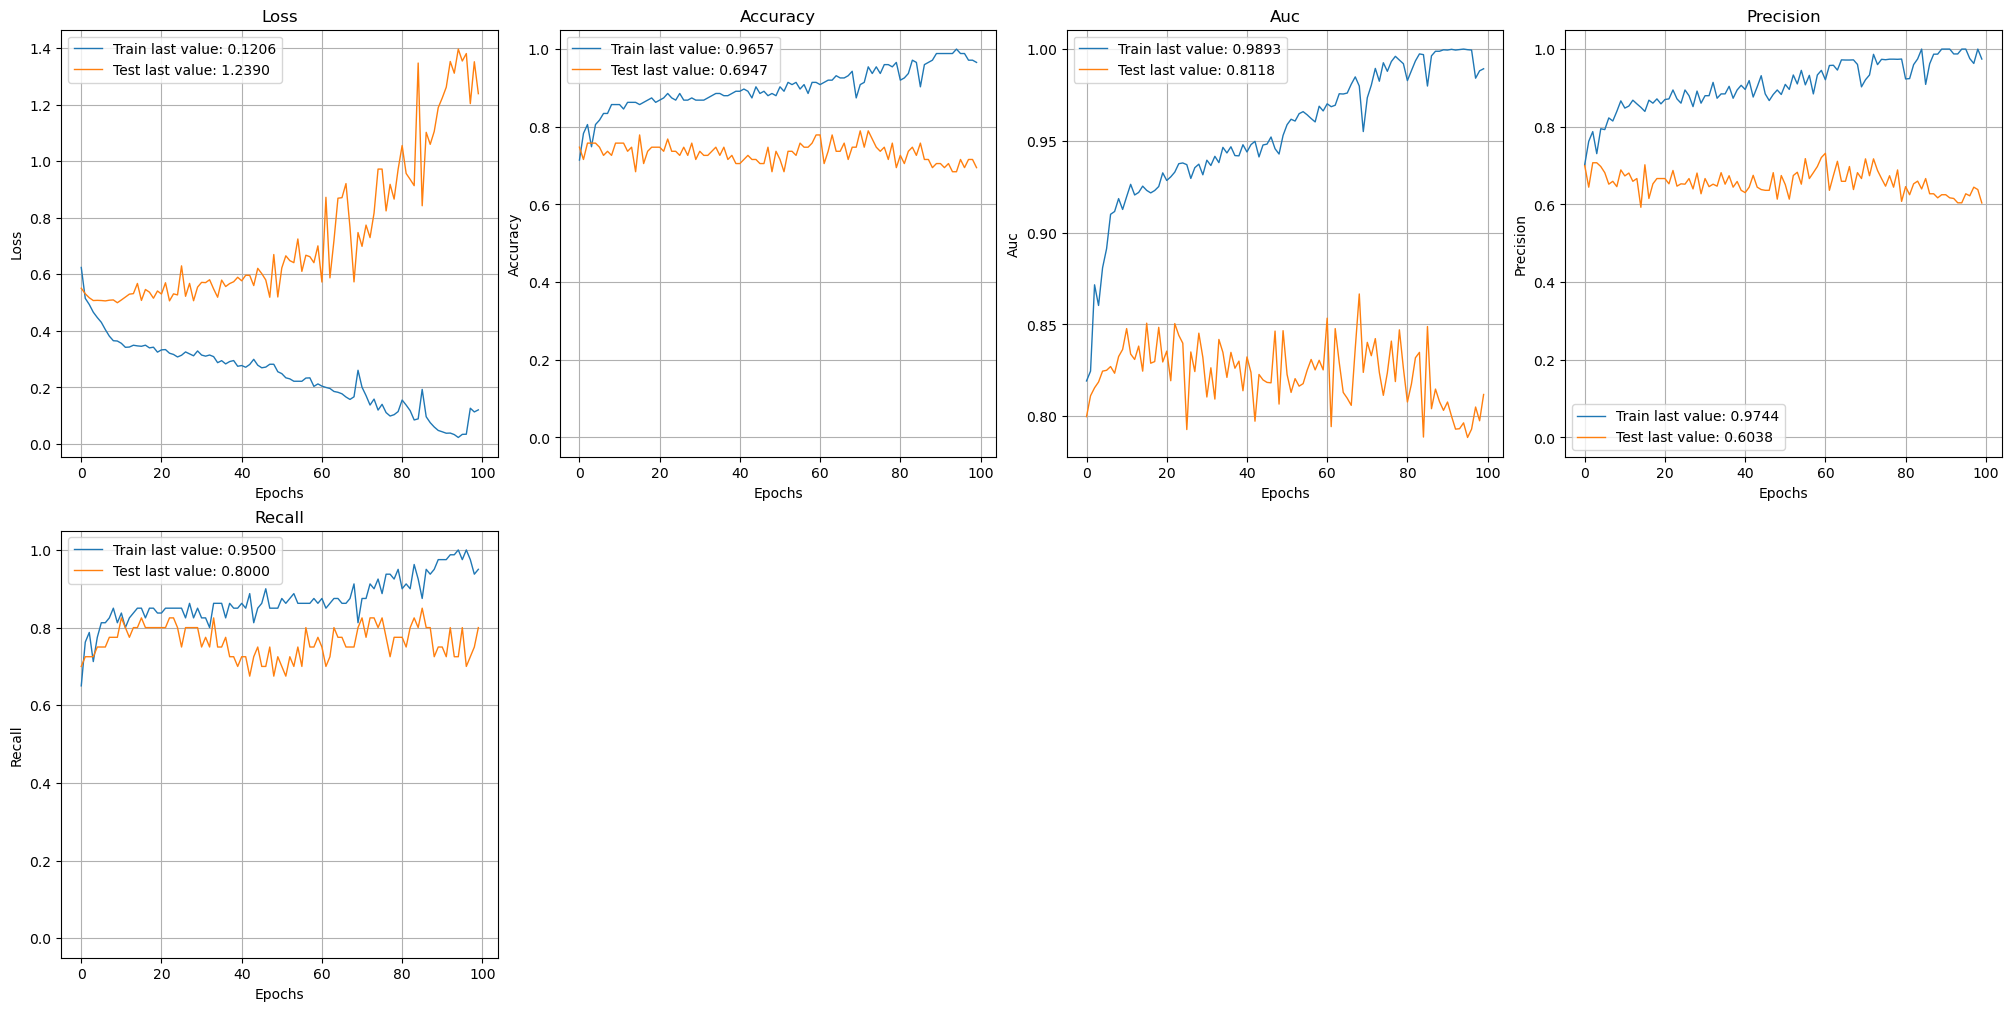

In [16]:
LSTM_perf = p_m(LSTM_history, 100)

In [17]:
accuracies.append(LSTM_perf[0])
precisions.append(LSTM_perf[1])
recalls.append(LSTM_perf[2])
AUCs.append(LSTM_perf[3])

# GRU

In [18]:
import numpy as np
from keras.models import Sequential
from keras.layers import GRU, Dense
from plot_keras_history import show_history, plot_history

# Reshape input data
x_train_re = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Define the model
model = Sequential()
# Add GRU layer
model.add(GRU(64, input_shape=(x_train_re.shape[1], 1)))
# Add dense layer
model.add(Dense(32, activation='relu'))
# Add output layer
model.add(Dense(1, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall','AUC'])

In [19]:
# fit the model to the training data
GRU_history=model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=100, batch_size=10)

Epoch 1/100
18/18 [==============================] - 5s 80ms/step - loss: 0.0000e+00 - accuracy: 0.4571 - precision: 0.4571 - recall: 1.0000 - auc: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.4211 - val_precision: 0.4211 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 2/100
18/18 [==============================] - 0s 17ms/step - loss: 0.0000e+00 - accuracy: 0.4571 - precision: 0.4571 - recall: 1.0000 - auc: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.4211 - val_precision: 0.4211 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 3/100
18/18 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.4571 - precision: 0.4571 - recall: 1.0000 - auc: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.4211 - val_precision: 0.4211 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 4/100
18/18 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.4571 - precision: 0.4571 - recall: 1.0000 - auc: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.4211 - val_p

[0.4571428596973419, 0.4571428596973419, 1.0, 0.5]


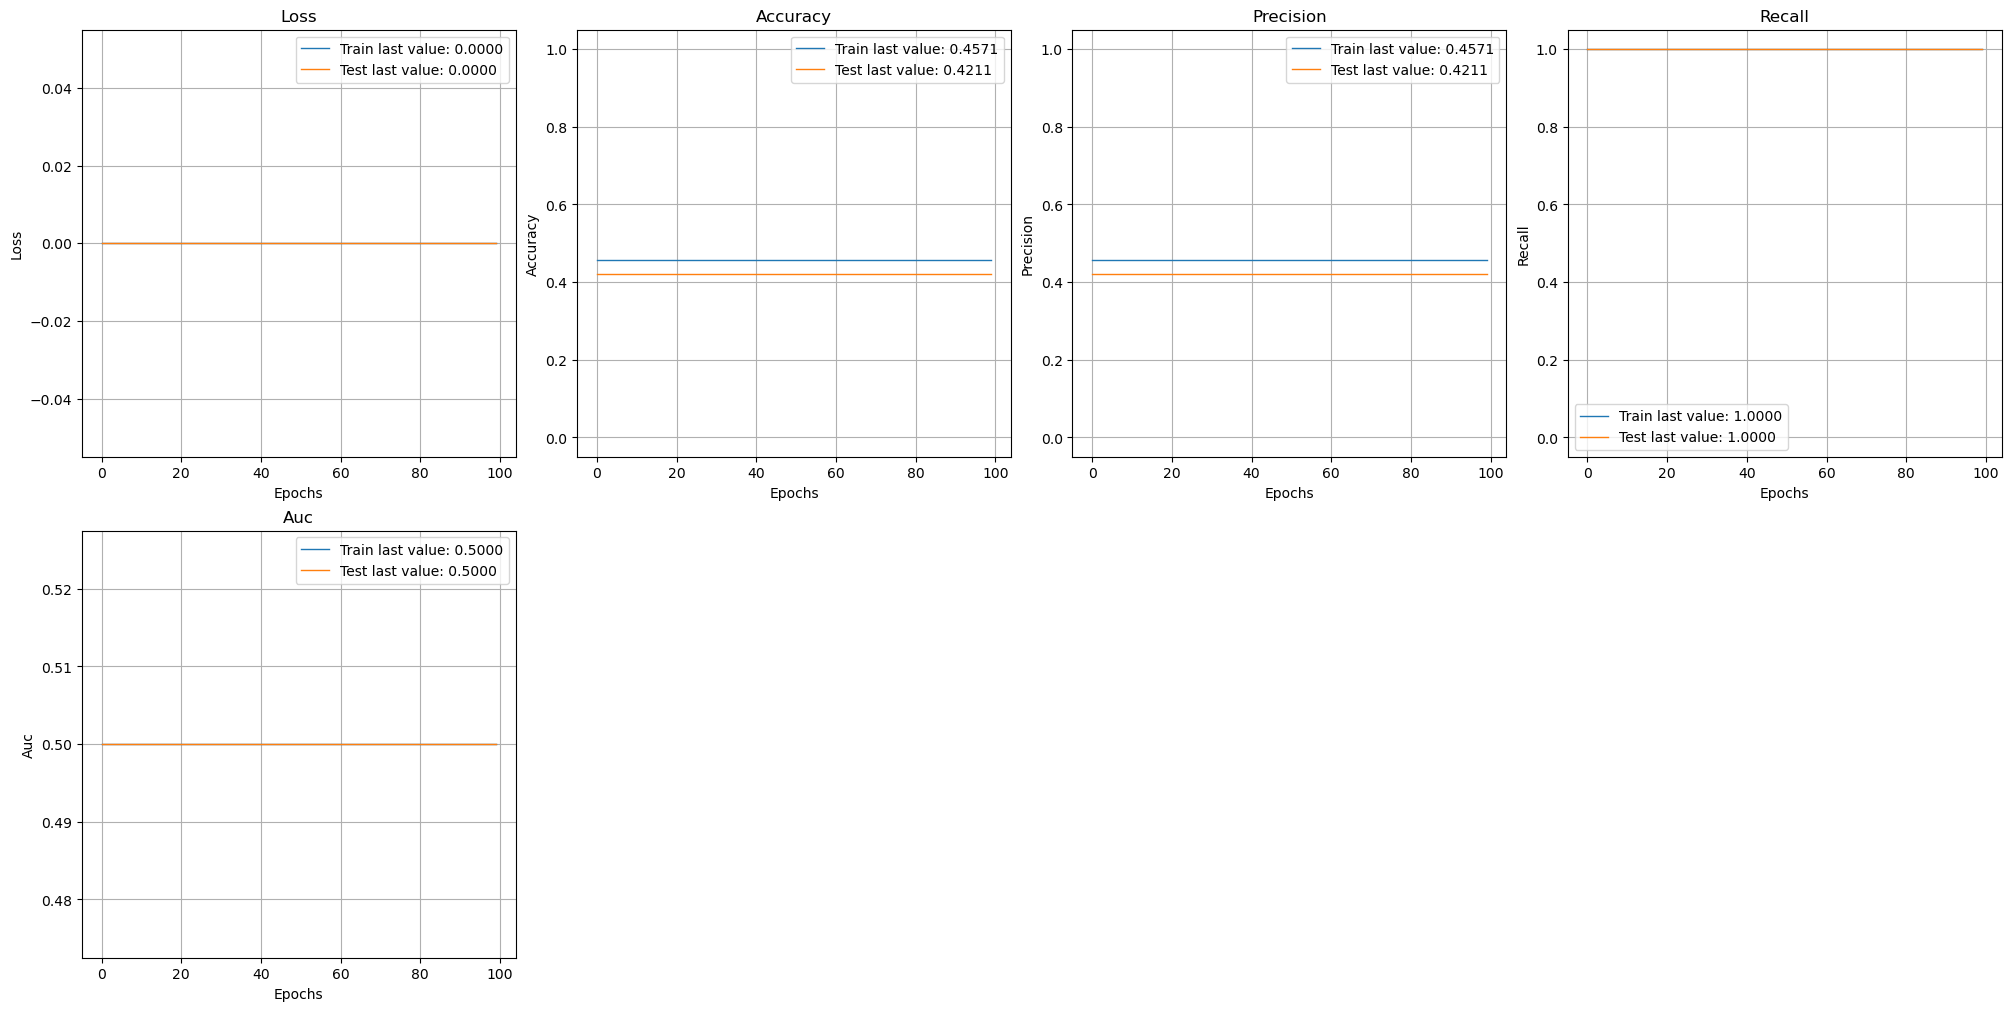

In [20]:
GRU_perf = p_m(GRU_history, 100)

In [21]:
accuracies.append(GRU_perf[0])
precisions.append(GRU_perf[1])
recalls.append(GRU_perf[2])
AUCs.append(GRU_perf[3])

In [22]:
names = ["LSTM", "GRU"]
classification_results = pd.DataFrame({
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall":recalls,
    "AUC":AUCs
})
classification_results.index = names
classification_results

,Accuracy,Precision,Recall,AUC
LSTM,0.965714,0.974359,0.95,0.989276
GRU,0.457143,0.457143,1.00,0.500000
